# Тестовое задание
Ответы подготовил Константин Фролов

Последнее обновление 19.09.2023

## Описание ТЗ

Есть два файла, src_survey и src_OnOff.

В таблице src_survey результат опроса респондентов - участников исследования, целью которого является проверка работы оборудования и регистрации респондентов на пиплметре (измерительное устройство для фиксации телесмотрения).

В рамках каждой процедуры в одном домохозяйстве (ДХ) проверяется, кто из респондентов находится в комнате с включенным телевизором. В ДХ может быть несколько приборов (телевизоров), могут проживать несколько респондентов. В опросе содержится информация по каждому телевизору и каждому респонденту

Далее, результат опроса сравнивается с данными регистрации респондента на пиплметре во время опроса, результат сравнения фиксируется в таблице (см. описание полей)

Нужно проанализировать:
1.	Количество ситуаций (абс, %), когда прибор фактически выключен (данные в таблице src_OnOff), а респондент утверждает, что включен
2.	Количество ситуаций (абс, %), когда прибор фактически включен (данные в таблице src_OnOff), а респондент утверждает, что выключен
3.	Выделить ДХ с размером более 1 человека, среди них ситуации, телевизор фактически включен, респондент по данным опроса находится в комнате с включенным телевизором, регистрации нет, а у других респондентов в этом ДХ регистрация на этом телевизоре есть. Необходимо сгруппировать результат в зависимости от размера ДХ.

Описание полей:
- статус телевизора по утверждению респондента: tv state
- размер ДХ: Кол-во человек в семье 4+
- наличие фактической регистрации на пиплметре: see
- наличие респондента в комнате с телевизором согласно опросу: display
- идентификатор ДХ: passport (PassportNumber в таблице src_OnOff)
- фактический статус телевизора: DeviceState (ON включен, OFF выключен)
- идентификатор респондента: button
- идентификатор телевизора: unit (UnitNumber в таблице src_OnOff)

Мы ждем:
1.	Скрипт Python
2.	Результат анализа (данные + небольшой аналитический комментарий)


## Получение данных

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [2]:
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
%cd /content/drive/My Drive/Analytics/Tests/test_1/

In [ ]:
%ls

In [6]:
try:
  src_survey = pd.read_excel('src_survey.xlsx')
  src_OnOff = pd.read_excel('src_OnOff.xlsx')
except NameError:
  print('NameError')

In [7]:
src_survey.info()
print()
src_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   code                       207 non-null    int64 
 1   passport                   207 non-null    int64 
 2   button                     207 non-null    object
 3   tv state                   207 non-null    object
 4   unit                       207 non-null    int64 
 5   day                        207 non-null    object
 6   cs_start                   207 non-null    object
 7   cs_finish                  207 non-null    object
 8   see                        207 non-null    object
 9   display                    207 non-null    object
 10  Кол-во человек в семье 4+  207 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 17.9+ KB



,code,passport,button,tv state,unit,day,cs_start,cs_finish,see,display,Кол-во человек в семье 4+
0,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1
1,258106,1205697,Б,включён,0,07.02.22,16:50:18,16:53:17,нет регистрации,в комнате,3
2,258106,1205697,А,включён,0,07.02.22,16:50:18,16:53:17,нет регистрации,нет в комнате,3
3,258106,1205697,В,включён,0,07.02.22,16:50:18,16:53:17,нет регистрации,в комнате,3
4,258109,1206994,А,выключен,1,2022-02-08 00:00:00,03:05:31,03:06:58,нет регистрации,нет в комнате,1


In [8]:
src_OnOff.info()
print()
src_OnOff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642134 entries, 0 to 642133
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PassportNumber  642134 non-null  int64 
 1   UnitNumber      642134 non-null  int64 
 2   DeviceState     642134 non-null  object
 3   Begin           642134 non-null  object
 4   End             642134 non-null  object
dtypes: int64(2), object(3)
memory usage: 24.5+ MB



,PassportNumber,UnitNumber,DeviceState,Begin,End
0,10100003,0,OFF,2022-02-07 02:00:00.000,2022-02-08 02:00:00.000
1,10100003,0,OFF,2022-02-08 02:00:00.000,2022-02-08 11:48:42.000
2,10100003,0,ON,2022-02-08 11:48:42.000,2022-02-08 12:36:55.000
3,10100003,0,OFF,2022-02-08 12:36:55.000,2022-02-08 22:05:17.000
4,10100003,0,ON,2022-02-08 22:05:17.000,2022-02-08 23:48:03.000


## Предобработка данных

Объединим два датасета по идентификатору ДХ и идентификатору телевизора.

In [9]:
src_OnOff_1 = src_OnOff
src_OnOff_1.columns = ['passport', 'unit', 'DeviceState', 'Begin', 'End']

In [10]:
result = pd.merge(src_survey, src_OnOff_1, how="left", on=['passport', 'unit'])

In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9273
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   code                       9274 non-null   int64 
 1   passport                   9274 non-null   int64 
 2   button                     9274 non-null   object
 3   tv state                   9274 non-null   object
 4   unit                       9274 non-null   int64 
 5   day                        9274 non-null   object
 6   cs_start                   9274 non-null   object
 7   cs_finish                  9274 non-null   object
 8   see                        9274 non-null   object
 9   display                    9274 non-null   object
 10  Кол-во человек в семье 4+  9274 non-null   int64 
 11  DeviceState                9274 non-null   object
 12  Begin                      9274 non-null   object
 13  End                        9274 non-null   object
dtypes: int64

In [12]:
result.head()

,code,passport,button,tv state,unit,day,cs_start,cs_finish,see,display,Кол-во человек в семье 4+,DeviceState,Begin,End
0,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,OFF,2022-02-07 02:00:00.000,2022-02-07 17:17:45.000
1,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,ON,2022-02-07 17:17:45.000,2022-02-07 21:46:30.000
2,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,OFF,2022-02-07 21:46:30.000,2022-02-08 02:00:00.000
3,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,OFF,2022-02-08 02:00:00.000,2022-02-08 16:39:15.000
4,258104,1204558,А,выключен,0,07.02.22,16:25:18,16:26:09,нет регистрации,нет в комнате,1,ON,2022-02-08 16:39:15.000,2022-02-08 21:13:21.000


## Вопросы №1 и №2

Сгруппируем данные по интересующим нас колонкам. Посчитаем абсолютные и относительные значения.

In [13]:
result_g = result.groupby(['DeviceState', 'tv state']).size().reset_index()

In [14]:
result_g.columns = ['DeviceState', 'TvStateRespondent', 'Cnt']
result_g.loc[result_g['DeviceState'] == 'OFF', 'Percentage'] = round((result_g['Cnt'] / result_g[result_g['DeviceState'] == 'OFF']['Cnt'].sum())* 100,0)
result_g.loc[result_g['DeviceState'] == 'ON', 'Percentage'] = round((result_g['Cnt'] / result_g[result_g['DeviceState'] == 'ON']['Cnt'].sum())* 100,0)
result_g = result_g.iloc[1: , :].copy()

In [15]:
result_g

,DeviceState,TvStateRespondent,Cnt,Percentage
1,OFF,включён,1420,26.0
2,OFF,выключен,3971,74.0
3,ON,включён,1041,27.0
4,ON,выключен,2834,73.0


Визуализируем полученные данные.

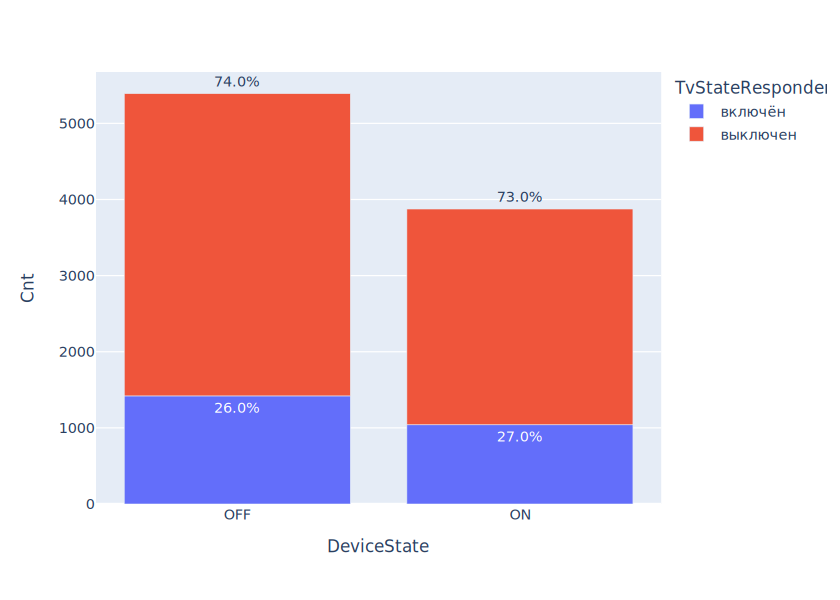

In [16]:
fig = px.bar(result_g,
             x='DeviceState',
             y='Cnt',
             color='TvStateRespondent',
             text_auto= False,
             text=result_g['Percentage'].apply(lambda x: '{0:1.1f}%'.format(x)))
fig.update_traces(textfont_size=12, textangle=0, cliponaxis=False, textposition="outside")
fig.write_image("figure.png", engine="kaleido")
fig.show()

**Выводы**

В представленной выше диаграмме мы имеем две колонки (слева - прибор фактически выключен, а справа - включен). Цвет характеризует ответы респондентов относительно состояния прибора (красный - выключен, синий - включен). При наведении курсора на диаграмму можно посмотреть абсолютные значения.

Видны заметные расхождения между фактическим состоянием телевизора и утверждениями респондентов:
- Когда телевизор включен, лишь 27% ответов респондентов фиксируют этот факт, тогда как 73% сообщают недостоверную информацию.
- Когда телевизор выключен, напротив, 74% ответов респондентов справделиво отмечают это обстоятельство, тогда как 26% передают неверные сведения.

О чем это говорит? По какой-то причине респондентам труднее отмечать и сообщать о включенном телевизоре, чем о выключенном. Возможно люди дают социально одобряемые ответы.

## Вопрос №3

Выделим ДХ с размером более 1 человека. Разделим его на два датасета, где первый будет соответствовать описанию задачи "телевизор фактически включен, респондент по данным опроса находится в комнате с включенным телевизором, регистрации нет", а второй будет отфильтровывать тех, у кого есть регистрация.

In [17]:
result0 = result.rename(columns={'Кол-во человек в семье 4+': 'ppl_cnt'})

In [18]:
result1 = result0.query('ppl_cnt > 1 and DeviceState == "ON" and display == "в комнате" and see == "нет регистрации"')
result1.groupby(['passport', 'unit']).agg({'passport':'nunique'})

,,passport
passport,unit,
1205697,0,1
1208135,1,1
1210425,0,1
1210930,1,1


In [19]:
result11 = result1['passport'].unique()
result11

array([1205697, 1208135, 1210425, 1210930])

Мы видим, что есть 4 подходящих ДХ и 2 группы устройств.

In [20]:
result2 = result0.query('ppl_cnt > 1 and see != "нет регистрации"')
result2['passport'].count()

779

In [21]:
result3 = pd.merge(result1, result2, how="outer")
result3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 893
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         894 non-null    int64 
 1   passport     894 non-null    int64 
 2   button       894 non-null    object
 3   tv state     894 non-null    object
 4   unit         894 non-null    int64 
 5   day          894 non-null    object
 6   cs_start     894 non-null    object
 7   cs_finish    894 non-null    object
 8   see          894 non-null    object
 9   display      894 non-null    object
 10  ppl_cnt      894 non-null    int64 
 11  DeviceState  894 non-null    object
 12  Begin        894 non-null    object
 13  End          894 non-null    object
dtypes: int64(4), object(10)
memory usage: 104.8+ KB


In [22]:
result33 = result3.query('passport in @result11 and see != "нет регистрации"')
result33

,code,passport,button,tv state,unit,day,cs_start,cs_finish,see,display,ppl_cnt,DeviceState,Begin,End
172,258124,1210425,А,включён,0,07.02.22,17:57:43,18:07:25,есть регистрация,в комнате,2,OFF,2022-02-07 02:00:00.000,2022-02-07 09:41:49.000
173,258124,1210425,А,включён,0,07.02.22,17:57:43,18:07:25,есть регистрация,в комнате,2,ON,2022-02-07 09:41:49.000,2022-02-07 11:31:21.000
174,258124,1210425,А,включён,0,07.02.22,17:57:43,18:07:25,есть регистрация,в комнате,2,OFF,2022-02-07 11:31:21.000,2022-02-07 13:38:42.000
175,258124,1210425,А,включён,0,07.02.22,17:57:43,18:07:25,есть регистрация,в комнате,2,ON,2022-02-07 13:38:42.000,2022-02-07 14:38:25.000
176,258124,1210425,А,включён,0,07.02.22,17:57:43,18:07:25,есть регистрация,в комнате,2,OFF,2022-02-07 14:38:25.000,2022-02-07 17:01:51.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,258128,1210930,А,включён,1,07.02.22,18:52:47,18:54:12,есть регистрация,в комнате,4,OFF,2022-02-15 02:00:00.000,2022-02-15 14:42:32.000
308,258128,1210930,А,включён,1,07.02.22,18:52:47,18:54:12,есть регистрация,в комнате,4,ON,2022-02-15 14:42:32.000,2022-02-15 19:38:38.000
309,258128,1210930,А,включён,1,07.02.22,18:52:47,18:54:12,есть регистрация,в комнате,4,OFF,2022-02-15 19:38:38.000,2022-02-15 19:57:20.000
310,258128,1210930,А,включён,1,07.02.22,18:52:47,18:54:12,есть регистрация,в комнате,4,ON,2022-02-15 19:57:20.000,2022-02-15 23:50:20.000


In [23]:
result_fig = result33[['passport', 'ppl_cnt']].value_counts().to_frame().reset_index()

In [24]:
#идентификатор ДХ и группировка по размеру
result_fig = result_fig[['passport', 'ppl_cnt']]
result_fig

,passport,ppl_cnt
0,1210425,2
1,1210930,4


In [25]:
#всего уникальных ДХ в датасете
result['passport'].nunique()

45

In [26]:
#распределение всех ДХ по размеру
result0['ppl_cnt'].value_counts()

2    3345
3    2472
4    2072
6     570
7     455
1     360
Name: ppl_cnt, dtype: int64

**Вывод**

Итак, из четырех ДХ первого датасета остались только два ДХ, в которых выполняется наше условие. О чем это говорит?
1. В большинстве случаев (43 ДХ или 95%) люди, которые находятся в одном ДХ, зарегистрированы в устройстве пиплметр и попадают в статистику. Меньшинство (2ДХ или 5%) имеет зрителей, которые не зарегистрированы, но продолжают смотреть телевизор.
2. Размер таких домохозяйств находится в диапазоне от 2 до 4, что не выделяется на общем фоне.